In [3]:
import numpy as np
import pandas as pd
import pickle

In [17]:
sands   = np.loadtxt('../data/SAND_IMAGE_HSV.txt')
shales  = np.loadtxt('../data/SHALE_IMAGE_HSV.txt')
heteros = np.loadtxt('../data/HETEROLITHIC_IMAGE_HSV.txt')

for clrs in [sands, shales, heteros]:
    print(clrs.shape)

(46494, 3)
(19080, 3)
(5796, 3)


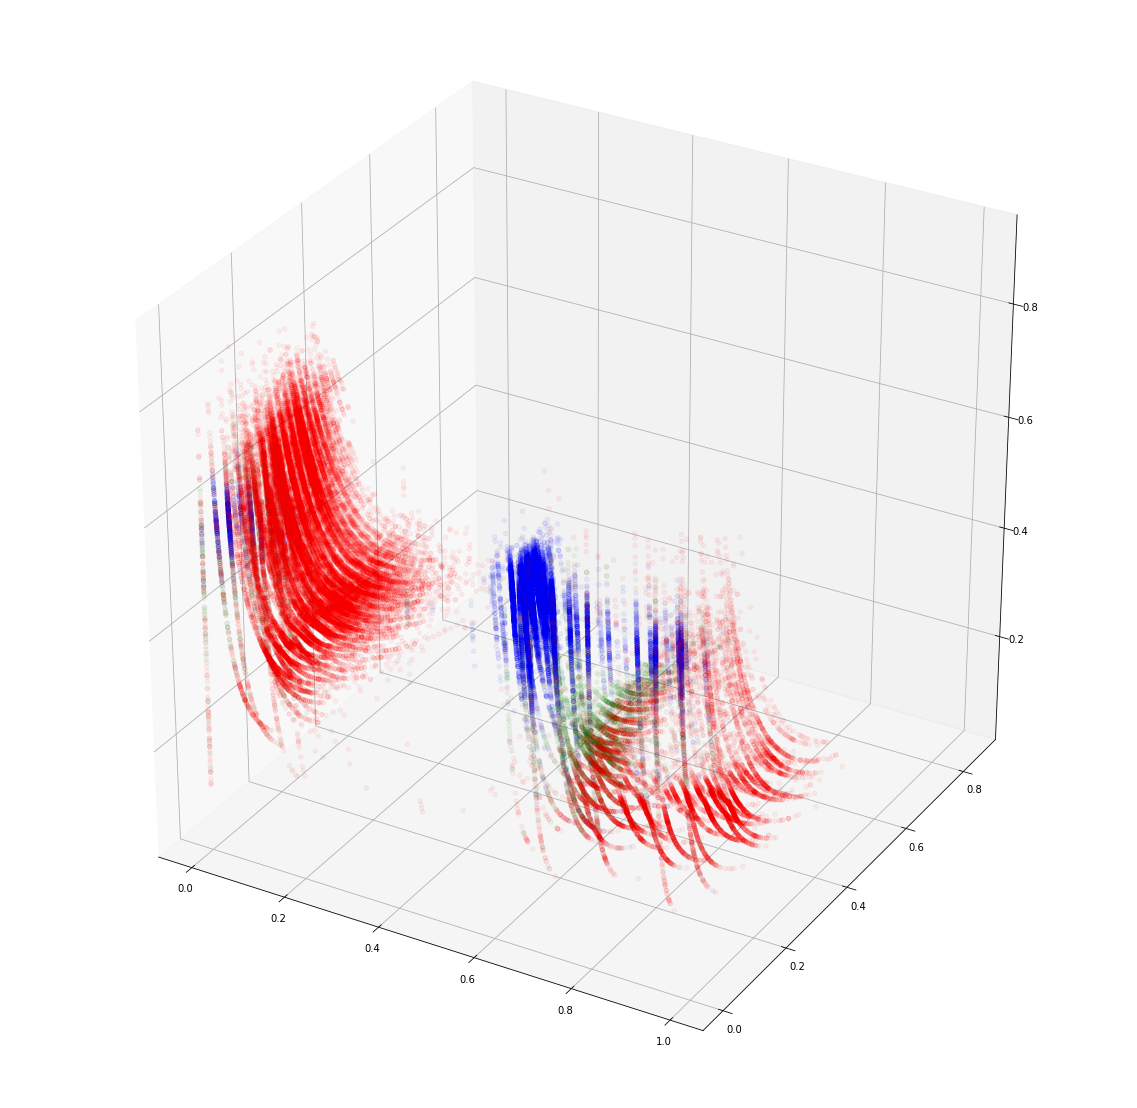

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sands[:,0], sands[:,1], sands[:,2], zdir='z', c= 'red', alpha=0.05)
ax.scatter(shales[:,0], shales[:,1], shales[:,2], zdir='z', c= 'blue', alpha=0.05)
ax.scatter(heteros[:,0], heteros[:,1], heteros[:,2], zdir='z', c= 'green', alpha=0.05)
plt.show()

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [48]:
# set up training data
X = np.vstack([sands, heteros, shales])
print(X.shape)
y = np.hstack([np.repeat([2], sands.shape[0]),
               np.repeat([1], heteros.shape[0]),
               np.repeat([0], shales.shape[0])])

(71370, 3)


In [74]:
adaboost_clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(adaboost_clf, X, y, cv=6)
scores.mean()

0.88703937228527396

In [50]:
import pickle

adaboost_clf.fit(X, y)

pickle.dump(adaboost_clf, open('../models/AdaBoosted_clf.pickle', 'wb'))

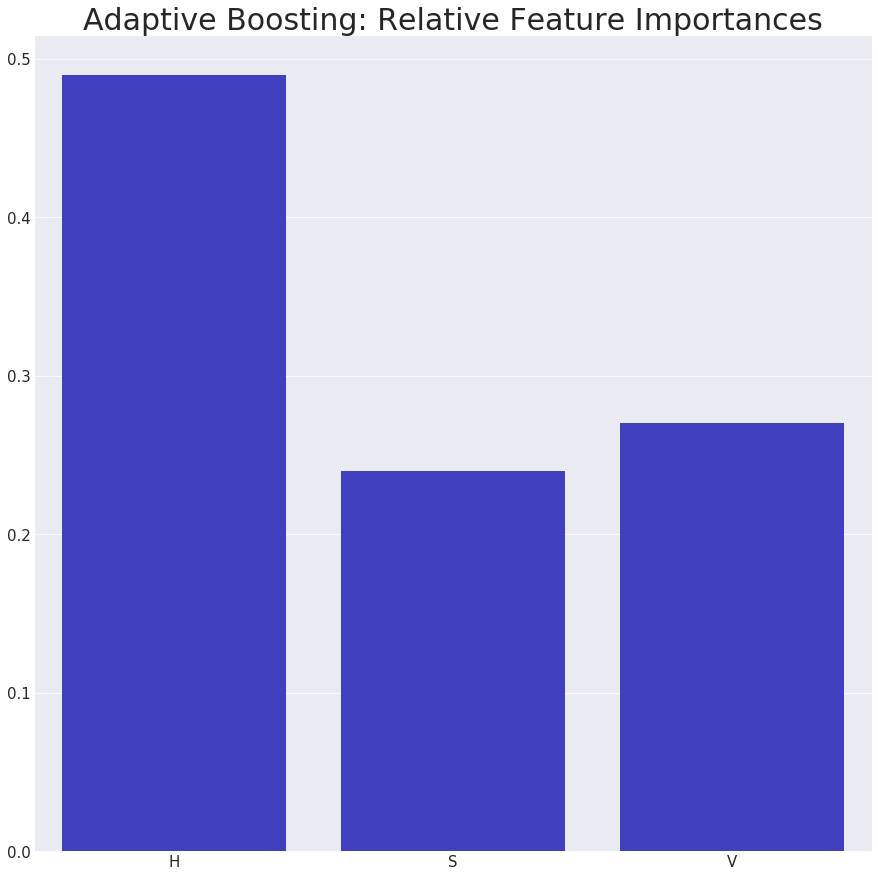

In [69]:
# feature importances
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')


fig, ax = plt.subplots(figsize=(15,15))
x = ['H', 'S', 'V']
imp = adaboost_clf.feature_importances_

ax.set_title('Adaptive Boosting: Relative Feature Importances', fontsize=30)
sns.barplot(x, imp, color='blue', saturation=0.5, ax=ax)
ax.tick_params(labelsize=15)